In [1]:
import quandl
import pandas as pd
from matplotlib import pyplot as plt
import requests
import statsmodels.tsa.stattools as ts 
from statsmodels.tsa.vector_ar.vecm import coint_johansen
import scipy.stats as st
from numpy_ext import rolling_apply # multipler parameters
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
symbols = pd.read_csv("crypto_ohlc/symbols.csv").symbol.tolist()
df = ((pd.concat([pd.read_csv(f"crypto_ohlc/{symbol}.csv", index_col='date', parse_dates=True)
        ['close'].rename(symbol)for symbol in symbols],axis=1,sort=True)))
df = df.loc[:,~df.columns.duplicated()]
df.head()

,BTCUSDT,ETHUSDT,BNBUSDT,NEOUSDT,LTCUSDT,QTUMUSDT,ADAUSDT,XRPUSDT,EOSUSDT,ONEUSDT,...,ZECUSDT,IOSTUSDT,CELRUSDT,DASHUSDT,OMGUSDT,THETAUSDT,ENJUSDT,MITHUSDT,MATICUSDT,ATOMUSDT
date,,,,,,,,,,,,,,,,,,,,,
2020-01-01,7200.85,130.77,13.7184,8.850,41.62,1.603,0.03348,0.19305,2.6039,0.00466,...,28.07,0.004817,0.00362,41.84,0.6214,0.08656,0.07963,0.00757,0.01496,4.380
2020-01-02,6965.71,127.19,13.0105,8.462,39.43,1.533,0.03269,0.18750,2.4593,0.00470,...,27.02,0.004605,0.00340,40.04,0.5950,0.08443,0.07371,0.00699,0.01467,4.096
2020-01-03,7344.96,134.35,13.6474,8.888,42.23,1.629,0.03417,0.19338,2.6396,0.00478,...,28.41,0.004819,0.00355,43.92,0.6248,0.08771,0.07800,0.00739,0.01512,4.237
2020-01-04,7354.11,134.20,13.8092,9.077,42.78,1.642,0.03434,0.19305,2.6481,0.00475,...,29.91,0.004869,0.00355,46.19,0.6246,0.09394,0.07720,0.00728,0.01484,4.250
2020-01-05,7358.75,135.37,14.0532,9.020,43.30,1.631,0.03460,0.19453,2.6865,0.00466,...,30.81,0.004916,0.00349,51.17,0.6367,0.09421,0.07637,0.00734,0.01483,4.200


# Cointegration test

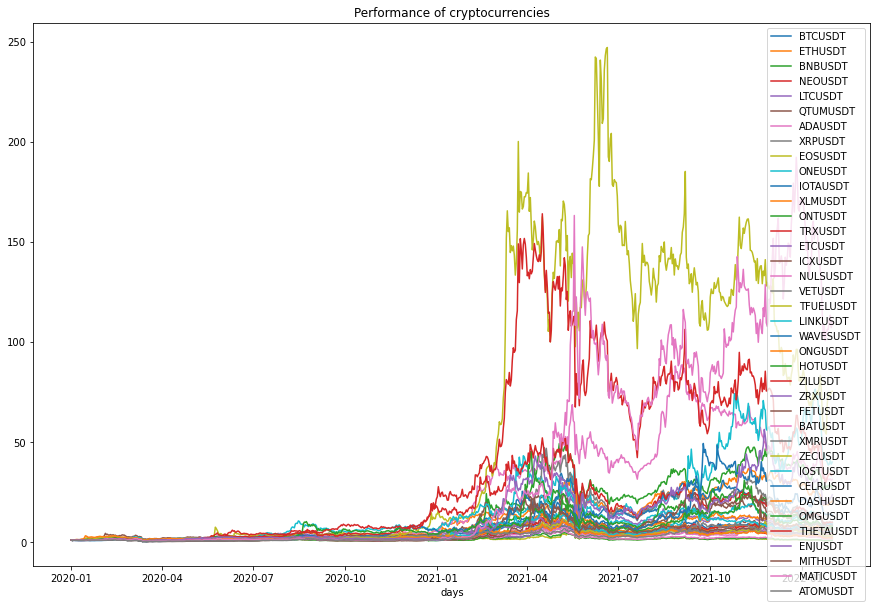

ETHUSDT and BNBUSDT: p-value = 0.03979705332444582
ETHUSDT and FETUSDT: p-value = 0.009294446232473275
ETHUSDT and ATOMUSDT: p-value = 0.023721913440312683
BNBUSDT and ETHUSDT: p-value = 0.04184327180902625
BNBUSDT and ONEUSDT: p-value = 0.017484822695047326
BNBUSDT and TFUELUSDT: p-value = 0.03356023967788704
BNBUSDT and ONGUSDT: p-value = 0.017847752585666694
BNBUSDT and HOTUSDT: p-value = 0.03491978636054913
BNBUSDT and FETUSDT: p-value = 0.04605206033659679
BNBUSDT and CELRUSDT: p-value = 0.018390725167988196
BNBUSDT and ENJUSDT: p-value = 0.02378173173397498
BNBUSDT and MATICUSDT: p-value = 0.038107528953613565
NEOUSDT and TFUELUSDT: p-value = 0.0001684619737509815
NEOUSDT and HOTUSDT: p-value = 0.018482944552887164
NEOUSDT and ZILUSDT: p-value = 0.025957842103161946
NEOUSDT and THETAUSDT: p-value = 2.6834950126713157e-07
LTCUSDT and BTCUSDT: p-value = 0.03861984946462687
LTCUSDT and IOTAUSDT: p-value = 0.0190484896026411
LTCUSDT and XLMUSDT: p-value = 0.00039515054718914565
LTCUS

WAVESUSDT and TRXUSDT: p-value = 0.01116972877720734
WAVESUSDT and VETUSDT: p-value = 0.015683923691441275
WAVESUSDT and TFUELUSDT: p-value = 0.001632307403118933
WAVESUSDT and ONGUSDT: p-value = 8.897822036597178e-05
WAVESUSDT and HOTUSDT: p-value = 0.006923414180555478
WAVESUSDT and FETUSDT: p-value = 0.0023848624756069073
WAVESUSDT and OMGUSDT: p-value = 0.042239187944367554
WAVESUSDT and THETAUSDT: p-value = 0.01907919031528317
ONGUSDT and ETHUSDT: p-value = 0.03418164222454803
ONGUSDT and BNBUSDT: p-value = 0.009574291195622732
ONGUSDT and QTUMUSDT: p-value = 0.022383863688809253
ONGUSDT and ADAUSDT: p-value = 0.009979372077112915
ONGUSDT and XRPUSDT: p-value = 0.005212552926376681
ONGUSDT and IOTAUSDT: p-value = 0.03279373127168058
ONGUSDT and TRXUSDT: p-value = 0.0018682625614575505
ONGUSDT and VETUSDT: p-value = 0.0014384162716002712
ONGUSDT and TFUELUSDT: p-value = 0.03851453444051624
ONGUSDT and WAVESUSDT: p-value = 0.00010944247282061185
ONGUSDT and HOTUSDT: p-value = 0.0098

MITHUSDT and DASHUSDT: p-value = 0.006560933853022412
MITHUSDT and THETAUSDT: p-value = 0.0006217928037544199
MATICUSDT and BNBUSDT: p-value = 0.03431794557039632
MATICUSDT and ONEUSDT: p-value = 0.03274629846865262
MATICUSDT and CELRUSDT: p-value = 0.03781541470290243
ATOMUSDT and ETHUSDT: p-value = 0.014003139677686655
ATOMUSDT and ONEUSDT: p-value = 0.0030698077520654433
ATOMUSDT and FETUSDT: p-value = 0.03033057537430436
ATOMUSDT and BATUSDT: p-value = 0.023245696792688585
ATOMUSDT and CELRUSDT: p-value = 0.01721653317572078
ATOMUSDT and ENJUSDT: p-value = 0.0074358629487091725


In [3]:
norm_prices = df.divide(df.iloc[0])

plt.figure(figsize = (15, 10))
plt.plot(norm_prices)
plt.xlabel('days')
plt.title('Performance of cryptocurrencies')
plt.legend(symbols)
plt.show()

result_list = []
for a1 in df.columns:
    for a2 in df.columns:
        if a1 != a2:
            test_result = ts.coint(df[a1], df[a2])
            if test_result[1] < 0.05:
                print(a1 + ' and ' + a2 + ': p-value = ' + str(test_result[1]))
                result_list.append((a1, a2, test_result[1]))

# regression

In [46]:
import statsmodels.formula.api as sm
import statsmodels.tsa.stattools as ts

def z_score(yport):
    zscore = (yport[-1]  - yport.mean()) / yport.std()
    
    return zscore

def outToUp(ANewPrice, BNewPrice, aPositionRatio, bPositionRatio):
    global init
    """
    statusList = (0,1)
    """
    entryDate.append(index)
    aTotal = init/(abs(aPositionRatio) + abs(bPositionRatio))
    bTotal = aTotal * abs(bPositionRatio)
    init -=(aTotal + bTotal) 
    AEntryPrice.append(ANewPrice)
    BEntryPrice.append(BNewPrice)
    AEntryPosition.append(aTotal/ANewPrice)
    BEntryPosition.append(bTotal/BNewPrice)
    AEntry.append(aTotal)
    BEntry.append(bTotal)
    totalEntry.append(aTotal + bTotal)

#     balanceDict['A']['total'] += aTotal
#     balanceDict['A']['position'] += aTotal/ANewPrice
#     balanceDict['B']['total'] += bTotal
#     balanceDict['B']['position'] += -(bTotal/BNewPrice)
#     init -= (aTotal + bTotal) 
    
def outToDown(ANewPrice, BNewPrice, aPositionRatio, bPositionRatio):
    global init
    """
    statusList = (0,-1)
    A:long
    B:short
    """
    entryDate.append(index)
    aTotal = init/(abs(aPositionRatio) + abs(bPositionRatio))
    bTotal = aTotal * abs(bPositionRatio)
    init -=(aTotal + bTotal) 
    AEntryPrice.append(ANewPrice)
    BEntryPrice.append(BNewPrice)
    AEntryPosition.append(aTotal/ANewPrice)
    BEntryPosition.append(bTotal/BNewPrice)
    AEntry.append(aTotal)
    BEntry.append(bTotal)
    totalEntry.append(aTotal + bTotal)

#     balanceDict['A']['total'] +=  aTotal
#     balanceDict['A']['position'] += aTotal/ANewPrice
#     balanceDict['B']['total'] += bTotal
#     balanceDict['B']['position'] += -(bTotal/BNewPrice)
#     init -= (aTotal + bTotal)
#     shortOldPrice = BNewPrice

def upToOut(ANewPrice, BNewPrice, aPositionRatio, bPositionRatio):
    global init
    """
    statusList = (1,0)
    long A
    short B
    close the position
    """
    exitDate.append(index)
    AExitPrice.append(ANewPrice)
    BExitPrice.append(BNewPrice)
    AExitPosition.append(AEntryPosition[-1])
    BExitPosition.append(BEntryPosition[-1])
    AExit.append(AEntryPosition[-1] * (ANewPrice - AEntryPrice[-1] + AEntryPrice[-1]))
    BExit.append(BEntryPosition[-1] * (BEntryPrice[-1] - BNewPrice + BEntryPrice[-1]))
    init = AEntryPosition[-1] * (ANewPrice - AEntryPrice[-1] + AEntryPrice[-1]) + BEntryPosition[-1] * (BEntryPrice[-1] - BNewPrice + BEntryPrice[-1])
    totalExit.append(init)
    
#     aTotal = balanceDict['A']['position'] * ANewPrice
#     bTotal = balanceDict['B']['position'] * BNewPrice
#     balanceDict['A']['total'] += balanceDict['A']['position'] * (ANewPrice - AOldOrderPrice + AOldOrderPrice) 
#     balanceDict['A']['position'] -= balanceDict['A']['position']
#     balanceDict['B']['total'] += abs(balanceDict['B']['position']) * (BOldOrderPrice - BNewPrice + BOldOrderPrice)
#     balanceDict['B']['position'] -= balanceDict['B']['position']  
#     init = aTotal + bTotal
def upToDown(ANewPrice, BNewPrice, aPositionRatio, bPositionRatio):
    global init
    """
    statusList = (1,-1)
    long A
    short B
    close the position
    long B 
    short A
    """
    exitDate.append(index)
    AExitPrice.append(ANewPrice)
    BExitPrice.append(BNewPrice)
    AExitPosition.append(AEntryPosition[-1])
    BExitPosition.append(BEntryPosition[-1])
    AExit.append(AEntryPosition[-1] * (ANewPrice - AEntryPrice[-1] + AEntryPrice[-1]))
    BExit.append(BEntryPosition[-1] * (BEntryPrice[-1] - BNewPrice + BEntryPrice[-1]))
    init = AEntryPosition[-1] * (ANewPrice - AEntryPrice[-1] + AEntryPrice[-1]) + BEntryPosition[-1] * (BEntryPrice[-1] - BNewPrice + BEntryPrice[-1])
    totalExit.append(init) 
    
    entryDate.append(index)
    aTotal = init/(abs(aPositionRatio) + abs(bPositionRatio))
    bTotal = aTotal * abs(bPositionRatio)
    init -=(aTotal + bTotal)
    AEntryPrice.append(ANewPrice)
    BEntryPrice.append(BNewPrice)
    AEntryPosition.append(aTotal/ANewPrice)
    BEntryPosition.append(bTotal/BNewPrice)
    AEntry.append(aTotal)
    BEntry.append(bTotal)
    totalEntry.append(aTotal + bTotal)

#     balanceDict['A']['total'] -=  ANewPrice * abs(aPos)
#     balanceDict['A']['position'] += aPos
#     balanceDict['B']['total'] -= BNewPrice * abs(bPos)
#     balanceDict['B']['position'] += -(bPos * aPos)
    
def downToOut(ANewPrice, BNewPrice, aPositionRatio, bPositionRatio):
    global init
    """
    statusList = (-1,0)
    long B
    short A
    close the position
    """
    exitDate.append(index)
    AExitPrice.append(ANewPrice)
    BExitPrice.append(BNewPrice)
    AExitPosition.append(AEntryPosition[-1])
    BExitPosition.append(BEntryPosition[-1])
    AExit.append(AEntryPosition[-1] * (AEntryPrice[-1] - ANewPrice + AEntryPrice[-1]))
    BExit.append(BEntryPosition[-1] * (BNewPrice - BEntryPrice[-1] + BEntryPrice[-1]))
    init = AEntryPosition[-1] * (AEntryPrice[-1] - ANewPrice + AEntryPrice[-1]) + BEntryPosition[-1] * (BNewPrice - BEntryPrice[-1] + BEntryPrice[-1])
    totalExit.append(init)
    
#     balanceDict['A']['total'] += aTotal
#     balanceDict['A']['position'] += balanceDict['A']['position']
#     balanceDict['B']['total'] += bTotal
#     balanceDict['B']['position'] += balanceDict['B']['position'] 
#     init -= (aTotal + bTotal)
#     shortOldPrice = ANewPrice
    
def downToUp(ANewPrice, BNewPrice, aPositionRatio, bPositionRatio):
    global init
    """
    statusList = (-1,1)
    long B
    short A
    close the position
    long A
    short B
    """
    exitDate.append(index)
    AExitPrice.append(ANewPrice)
    BExitPrice.append(BNewPrice)
    AExitPosition.append(AEntryPosition[-1])
    BExitPosition.append(BEntryPosition[-1])
    AExit.append(AEntryPosition[-1] * (AEntryPrice[-1] - ANewPrice + AEntryPrice[-1]))
    BExit.append(BEntryPosition[-1] * (BNewPrice - BEntryPrice[-1] + BEntryPrice[-1]))
    init = AEntryPosition[-1] * (AEntryPrice[-1] - ANewPrice + AEntryPrice[-1]) + BEntryPosition[-1] * (BNewPrice - BEntryPrice[-1] + BEntryPrice[-1])
    totalExit.append(init)
    
    entryDate.append(index)
    aTotal = init/(abs(aPositionRatio) + abs(bPositionRatio))
    bTotal = aTotal * abs(bPositionRatio)
    init -=(aTotal + bTotal)
    AEntryPrice.append(ANewPrice)
    BEntryPrice.append(BNewPrice)
    AEntryPosition.append(aTotal/ANewPrice)
    BEntryPosition.append(bTotal/BNewPrice)
    AEntry.append(aTotal)
    BEntry.append(bTotal)
    totalEntry.append(aTotal + bTotal)
    
#     balanceDict['A']['total'] += abs(balanceDict['A']['position']) * (AOldOrderPrice - ANewPrice + AOldOrderPrice)
#     balanceDict['A']['position'] -= balanceDict['A']['position']
#     balanceDict['B']['total'] += balanceDict['B']['position'] * (BNewPrice - BOldOrderPrice + BOldOrderPrice)
#     balanceDict['B']['position'] -= balanceDict['B']['position']   
    
#     balanceDict['A']['total'] -= ANewPrice * abs(aPos)
#     balanceDict['A']['position'] += aPos
#     balanceDict['B']['total'] -= BNewPrice * abs(bPos)
#     balanceDict['B']['position'] += -(bPos * aPos)


strategy = {(1,0): upToOut, 
            (1,-1):upToDown,
            (0,1): outToUp,
            (0,-1):outToDown,
            (-1,0):downToOut,
            (-1,1):downToUp}    

In [58]:
pd.set_option('display.float_format', lambda x: '%.8f' % x)
# import statsmodels.formula.api as sm
# import statsmodels.tsa.stattools as ts

for i in result_list:
    A_symbol, B_symbol = i[0], i[1]

    init = 100000
    pastStatus = 0
    lookback = 20

    shortOldPrice = 0
    balanceDict = {'A':{'total': 0, 'position':0}, 'B':{'total': 0, 'position':0}}
    entryZscore = 1 
    exitZscore = 0
    miniSpread = 0.01
    df1 = df[[A_symbol, B_symbol]]

    hedgeRatio=np.full(df1.shape[0], 0.0)

    for t in np.arange(lookback, len(hedgeRatio)):
        regress_results=sm.ols(formula="{} ~ {}".format(A_symbol, B_symbol), data=df1[(t-lookback):t]).fit() # Note this can deal with NaN in top row
        hedgeRatio[t-1]=regress_results.params[1] 

    df1['hedgeRatio'] = hedgeRatio 
    df1['yport'] = df1[A_symbol] - df1['hedgeRatio'] * df1[B_symbol]
    df1['zscore'] = rolling_apply(z_score, 20, df1['yport'])
    # df1['yport'].plot()

    history = pd.DataFrame()
    statusList = []
    pl = []
    record = pd.DataFrame()

    ASymbol, BSymbol = [], []
    entryDate, AEntryPrice, AEntryPosition, AEntry, BEntryPrice, BEntryPosition, BEntry, totalEntry= [], [], [], [], [], [], [], []
    exitDate,  AExitPrice, AExitPosition, AExit, BExitPrice, BExitPosition, BExit, totalExit= [], [], [], [], [], [], [], []
    for index, row in df1.iterrows():
        """
        hedgeRatio為B交易對部位比例
        currStatus為A交易對部位比例
        ex: 
        hedgeRatio = 49
        currStatus = -1
        init = 1000
        A交易對total = init/(abs(-1)+abs(49)) = 20
        B交易對total = A交易對total * 49 = 980
        """
        currStatus = 0 if (pastStatus == 1 and row['zscore'] > -entryZscore) or (pastStatus == -1 and row['zscore'] < exitZscore) else 
                     1 if row['zscore'] < -entryZscore else 
                    -1 if (pastStatus == -1 and row['zscore'] > exitZscore or row['zscore'] > entryZscore) else 0
        con = (pastStatus, currStatus)
        if pastStatus != currStatus:
            strategy[con](row[A_symbol], row[B_symbol], currStatus, row['hedgeRatio'] )
        else:
            pass

        pastStatus = currStatus
        statusList.append(currStatus)
    if len(entryDate) - len(exitDate) == 1:
        """
        場上有單，最後一天平倉
        """
        exitDate.append(df1.index[-1])
        AExitPrice.append(df1.loc[:, A_symbol][-1])
        AExitPosition.append(AEntryPosition[-1])
        Aex = AEntryPosition[-1] * (df1.loc[:, A_symbol][-1] - AEntryPrice[-1] + AEntryPrice[-1]) if AEntryPosition[-1] == 1 else AEntryPosition[-1] * (AEntryPrice[-1] - df1.loc[:, A_symbol][-1] + AEntryPrice[-1]) 
        AExit.append(Aex)
        BExitPrice.append(df1.loc[:, B_symbol][-1])
        BExitPosition.append(BEntryPosition[-1])
        Bex = BEntryPosition[-1] * (BEntryPrice[-1] - df1.loc[:, B_symbol][-1] + BEntryPrice[-1]) if AEntryPosition[-1] == 1 else BEntryPosition[-1] * (df1.loc[:, B_symbol][-1] - BEntryPrice[-1] + BEntryPrice[-1])
        BExit.append(Bex)
        totalExit.append(Aex + Bex)
        print("場上有單{}_{}已平倉".format(A_symbol, B_symbol))
    elif len(entryDate) - len(exitDate) > 1 or len(entryDate) != len(exitDate):
        assert False
    else:
        print("{}_{} 回測完成".format(A_symbol, B_symbol))
    np.set_printoptions(suppress=True)
    record['ASymbol'] = [A_symbol] * len(entryDate)
    record['BSymbol'] = [B_symbol] * len(entryDate)
    record['init'] = [100000] * len(entryDate)
    record['entryDate'] = entryDate
    record['AEntryPrice'] = AEntryPrice
    record['AEntryPosition'] = AEntryPosition
    record['AEntry'] = AEntry
    record['BEntryPrice'] = BEntryPrice
    record['BEntryPosition'] = BEntryPosition
    record['BEntry'] = BEntry
    record['totalEntry'] = totalEntry
    record['exitDate'] = exitDate
    record['AExitPrice'] = AExitPrice
    record['AExitPosition'] = AExitPosition
    record['AExit'] = AExit
    record['BExitPrice'] = BExitPrice
    record['BExitPosition'] = BExitPosition
    record['BExit'] = BExit
    record['totalExit'] = totalExit
    record['PNL'] = record['totalExit'] - record['totalEntry']

    win = [i for i in record['PNL'].tolist() if i > 0]
    loss = [i for i in record['PNL'].tolist() if i < 0]
    Profit_Factor = sum(win)/abs(sum(loss))
    Win_Loss_Rate = (sum(win)/len(win))/(-sum(loss)/len(loss))

    MDD,Capital,MaxCapital = 0,0,0
    for p in record['PNL'].tolist():
        Capital += p
        MaxCapital = max(MaxCapital,Capital)
        DD = MaxCapital - Capital
        MDD = max(MDD,DD)

    print('-----------------------------{}-{}--------------------------'.format(A_symbol, B_symbol))
    print('總損益: ', sum(record['PNL']))
    print('總交易次數: ', record.shape[0])
    print('平均損益: ', sum(record['PNL'])/record.shape[0])
    print('勝率: ', len(win)/record.shape[0])
    print('獲利因子: ', Profit_Factor)
    print('賺賠比: ', Win_Loss_Rate)
    print('最大資金回落: ', MDD)
    print('夏普比率: ', np.mean(record['PNL'])/np.std(record['PNL']))

# history.to_csv("/{}-{}-test.xls".format(A_symbol, B_symbol))
# print(history['return'])
# print('[pair trade]{}-{} {}%'.format(A_symbol, B_symbol, "{:.8f}".format(history['return'].iloc[-1] * 100)))
# plt.clf()
# history['return'].plot()
#     plt.show()
# plt.savefig("/{}-{}-test".format(A_symbol, B_symbol))

-----------------------------ETHUSDT-BNBUSDT--------------------------
總損益:  749943.515826188
總交易次數:  51
平均損益:  14704.774820121334
勝率:  0.47058823529411764
獲利因子:  1.8523599552246635
賺賠比:  2.083904949627746
最大資金回落:  398200.7531147859
夏普比率:  0.14552245953284748
-----------------------------ETHUSDT-FETUSDT--------------------------
總損益:  -75555.76539655628
總交易次數:  55
平均損益:  -1373.741189028296
勝率:  0.4909090909090909
獲利因子:  0.912029422089415
賺賠比:  0.945808289574208
最大資金回落:  410842.820119522
夏普比率:  -0.02471902681504359
ETHUSDT_ATOMUSDT 回測完成
-----------------------------ETHUSDT-ATOMUSDT--------------------------
總損益:  -66469.17176390132
總交易次數:  50
平均損益:  -1329.3834352780264
勝率:  0.46
獲利因子:  0.5841889012266582
賺賠比:  0.6857869710052075
最大資金回落:  84932.54034978316
夏普比率:  -0.17095694975871173
BNBUSDT_ETHUSDT 回測完成
-----------------------------BNBUSDT-ETHUSDT--------------------------
總損益:  1634649.2440106971
總交易次數:  46
平均損益:  35535.85313066733
勝率:  0.6956521739130435
獲利因子:  2.284319583152648
賺賠比: 

QTUMUSDT_IOSTUSDT 回測完成
-----------------------------QTUMUSDT-IOSTUSDT--------------------------
總損益:  -96553.44148207971
總交易次數:  53
平均損益:  -1821.7630468316927
勝率:  0.49056603773584906
獲利因子:  0.5175175691662547
賺賠比:  0.5374220910572645
最大資金回落:  97154.86597895791
夏普比率:  -0.18973531851375494
-----------------------------QTUMUSDT-THETAUSDT--------------------------
總損益:  2405053.652821673
總交易次數:  54
平均損益:  44538.03060780876
勝率:  0.7407407407407407
獲利因子:  4.46835806401779
賺賠比:  1.4522163708057818
最大資金回落:  226032.19690944394
夏普比率:  0.41119958515094823
QTUMUSDT_MITHUSDT 回測完成
-----------------------------QTUMUSDT-MITHUSDT--------------------------
總損益:  -137133.06201041647
總交易次數:  52
平均損益:  -2637.174269431086
勝率:  0.5192307692307693
獲利因子:  0.7979515682052516
賺賠比:  0.7388440446344923
最大資金回落:  422520.01156351576
夏普比率:  -0.042839469730454
-----------------------------ADAUSDT-XRPUSDT--------------------------
總損益:  -95103.35995359601
總交易次數:  50
平均損益:  -1902.0671990719202
勝率:  0.6
獲利因子:  0.45810269

ONEUSDT_BNBUSDT 回測完成
-----------------------------ONEUSDT-BNBUSDT--------------------------
總損益:  -93741.20245088795
總交易次數:  52
平均損益:  -1802.7154317478453
勝率:  0.4807692307692308
獲利因子:  0.6537987445481426
賺賠比:  0.706102644111994
最大資金回落:  121064.05980114343
夏普比率:  -0.13786483270178262
ONEUSDT_CELRUSDT 回測完成
-----------------------------ONEUSDT-CELRUSDT--------------------------
總損益:  -2653.659797906519
總交易次數:  65
平均損益:  -40.82553535240799
勝率:  0.5846153846153846
獲利因子:  0.9870859258090872
賺賠比:  0.7013505262327725
最大資金回落:  56940.509779131244
夏普比率:  -0.004142382729560815
ONEUSDT_MATICUSDT 回測完成
-----------------------------ONEUSDT-MATICUSDT--------------------------
總損益:  -83258.30036815055
總交易次數:  55
平均損益:  -1513.787279420919
勝率:  0.5272727272727272
獲利因子:  0.6269584169197021
賺賠比:  0.5621006496521467
最大資金回落:  100011.6261434178
夏普比率:  -0.1431609446821372
-----------------------------ONEUSDT-ATOMUSDT--------------------------
總損益:  -102986.4716885746
總交易次數:  55
平均損益:  -1872.4813034286292
勝率:  

-----------------------------ETCUSDT-BNBUSDT--------------------------
總損益:  -84002.83196233191
總交易次數:  45
平均損益:  -1866.7295991629314
勝率:  0.4444444444444444
獲利因子:  0.4987329300022404
賺賠比:  0.5984795160026886
最大資金回落:  113849.78629423662
夏普比率:  -0.15896087275754475
-----------------------------ETCUSDT-QTUMUSDT--------------------------
總損益:  -17705.57540695285
總交易次數:  52
平均損益:  -340.49183474909324
勝率:  0.4807692307692308
獲利因子:  0.9459559744803201
賺賠比:  0.9837942134595329
最大資金回落:  149791.54115441797
夏普比率:  -0.013928654633701921
-----------------------------ETCUSDT-ADAUSDT--------------------------
總損益:  374965.36983383796
總交易次數:  54
平均損益:  6943.803145071073
勝率:  0.5185185185185185
獲利因子:  1.3903689330821145
賺賠比:  1.241400833109031
最大資金回落:  305870.1745545332
夏普比率:  0.10400464360782766
-----------------------------ETCUSDT-XRPUSDT--------------------------
總損益:  -87856.83454045649
總交易次數:  44
平均損益:  -1996.7462395558293
勝率:  0.5
獲利因子:  0.7763525547628093
賺賠比:  0.7410638022735907
最大資金回落:  28059

VETUSDT_ADAUSDT 回測完成
-----------------------------VETUSDT-ADAUSDT--------------------------
總損益:  -97664.30323381277
總交易次數:  54
平均損益:  -1808.5982080335698
勝率:  0.5185185185185185
獲利因子:  0.7438504897053273
賺賠比:  0.6907183118692325
最大資金回落:  230962.08723244106
夏普比率:  -0.06362058481000565
-----------------------------VETUSDT-XRPUSDT--------------------------
總損益:  -99052.82183722025
總交易次數:  49
平均損益:  -2021.4861599432704
勝率:  0.3877551020408163
獲利因子:  0.3867165867272337
賺賠比:  0.6106051369377373
最大資金回落:  101024.64348270817
夏普比率:  -0.25556605444120306
VETUSDT_TRXUSDT 回測完成
-----------------------------VETUSDT-TRXUSDT--------------------------
總損益:  9345.664505165914
總交易次數:  48
平均損益:  194.70134385762321
勝率:  0.5208333333333334
獲利因子:  1.046651079354471
賺賠比:  0.9629189930061134
最大資金回落:  67169.89090626103
夏普比率:  0.014790930526805298
VETUSDT_ETCUSDT 回測完成
-----------------------------VETUSDT-ETCUSDT--------------------------
總損益:  -29373.798306983008
總交易次數:  62
平均損益:  -473.7709404352098
勝率:  0.54838

WAVESUSDT_ADAUSDT 回測完成
-----------------------------WAVESUSDT-ADAUSDT--------------------------
總損益:  -89129.9857032386
總交易次數:  49
平均損益:  -1818.979300066094
勝率:  0.40816326530612246
獲利因子:  0.4027371538284372
賺賠比:  0.583968873051234
最大資金回落:  91025.87089085444
夏普比率:  -0.21603441444317362
-----------------------------WAVESUSDT-XRPUSDT--------------------------
總損益:  -81053.66874134437
總交易次數:  54
平均損益:  -1500.9938655804513
勝率:  0.46296296296296297
獲利因子:  0.4292826994031982
賺賠比:  0.48079662333158196
最大資金回落:  94910.93347616424
夏普比率:  -0.2594174835343234
WAVESUSDT_TRXUSDT 回測完成
-----------------------------WAVESUSDT-TRXUSDT--------------------------
總損益:  -64996.62524455301
總交易次數:  51
平均損益:  -1274.4436322461374
勝率:  0.49019607843137253
獲利因子:  0.47315332852717185
賺賠比:  0.4920794616682587
最大資金回落:  88178.90590638312
夏普比率:  -0.24155924314397942
WAVESUSDT_VETUSDT 回測完成
-----------------------------WAVESUSDT-VETUSDT--------------------------
總損益:  -76616.766155499
總交易次數:  54
平均損益:  -1418.829002879611

-----------------------------HOTUSDT-XRPUSDT--------------------------
總損益:  -98691.96164829754
總交易次數:  55
平均損益:  -1794.399302696319
勝率:  0.4
獲利因子:  0.25516728216030776
賺賠比:  0.3827509232404616
最大資金回落:  111521.2156621227
夏普比率:  -0.2287913967806799
-----------------------------HOTUSDT-IOTAUSDT--------------------------
總損益:  -77116.06010362123
總交易次數:  55
平均損益:  -1402.1101837022043
勝率:  0.5272727272727272
獲利因子:  0.6161540182298909
賺賠比:  0.5311672570947334
最大資金回落:  114832.61741483932
夏普比率:  -0.14913718334052148
HOTUSDT_TRXUSDT 回測完成
-----------------------------HOTUSDT-TRXUSDT--------------------------
總損益:  -143801.1273654429
總交易次數:  46
平均損益:  -3126.1114644661498
勝率:  0.391304347826087
獲利因子:  0.3636279169185725
賺賠比:  0.5656434263177794
最大資金回落:  175613.8643931994
夏普比率:  -0.29814301725711045
-----------------------------HOTUSDT-ETCUSDT--------------------------
總損益:  -98360.77714530584
總交易次數:  54
平均損益:  -1821.4958730612193
勝率:  0.46296296296296297
獲利因子:  0.35169095184863475
賺賠比:  0.40796150

FETUSDT_XRPUSDT 回測完成
-----------------------------FETUSDT-XRPUSDT--------------------------
總損益:  -174891.2199749536
總交易次數:  55
平均損益:  -3179.8403631809742
勝率:  0.509090909090909
獲利因子:  0.6146082251200368
賺賠比:  0.5926579313657497
最大資金回落:  236848.3709310509
夏普比率:  -0.11203440053047856
FETUSDT_TRXUSDT 回測完成
-----------------------------FETUSDT-TRXUSDT--------------------------
總損益:  -70670.93922534086
總交易次數:  55
平均損益:  -1284.9261677334703
勝率:  0.41818181818181815
獲利因子:  0.5710656762520762
賺賠比:  0.794526158263758
最大資金回落:  72843.01463152084
夏普比率:  -0.18103346244545834
-----------------------------FETUSDT-WAVESUSDT--------------------------
總損益:  -103676.29092458021
總交易次數:  56
平均損益:  -1851.3623379389323
勝率:  0.4642857142857143
獲利因子:  0.5515758160880929
賺賠比:  0.6152191794828729
最大資金回落:  152085.97974707614
夏普比率:  -0.14104149085057346
FETUSDT_ONGUSDT 回測完成
-----------------------------FETUSDT-ONGUSDT--------------------------
總損益:  -101804.71834386986
總交易次數:  55
平均損益:  -1850.9948789794519
勝率:  0.

ZECUSDT_ENJUSDT 回測完成
-----------------------------ZECUSDT-ENJUSDT--------------------------
總損益:  -66058.12430393799
總交易次數:  51
平均損益:  -1295.2573392929019
勝率:  0.43137254901960786
獲利因子:  0.7755993902330545
賺賠比:  1.0223810143981171
最大資金回落:  147614.05343717308
夏普比率:  -0.06259791141912201
ZECUSDT_MITHUSDT 回測完成
-----------------------------ZECUSDT-MITHUSDT--------------------------
總損益:  -12868.707004289572
總交易次數:  50
平均損益:  -257.37414008579145
勝率:  0.56
獲利因子:  0.9775035086637002
賺賠比:  0.7680384710929073
最大資金回落:  285776.4416304121
夏普比率:  -0.005922865078088467
-----------------------------IOSTUSDT-QTUMUSDT--------------------------
總損益:  -100228.3416677758
總交易次數:  58
平均損益:  -1728.0748563409622
勝率:  0.46551724137931033
獲利因子:  0.756903177892889
賺賠比:  0.8690369820251689
最大資金回落:  277554.2796874157
夏普比率:  -0.06538872522071489
-----------------------------IOSTUSDT-XRPUSDT--------------------------
總損益:  -343049.6157094365
總交易次數:  54
平均損益:  -6352.770661285861
勝率:  0.5555555555555556
獲利因子:  0.79736

DASHUSDT_MITHUSDT 回測完成
-----------------------------DASHUSDT-MITHUSDT--------------------------
總損益:  -110287.91000052552
總交易次數:  50
平均損益:  -2205.7582000105103
勝率:  0.46
獲利因子:  0.8713893700119458
賺賠比:  1.0229353474053278
最大資金回落:  439169.5710461698
夏普比率:  -0.028272834467352737
-----------------------------OMGUSDT-ADAUSDT--------------------------
總損益:  -61305.18300596264
總交易次數:  48
平均損益:  -1277.1913126242216
勝率:  0.5
獲利因子:  0.7226875678733351
賺賠比:  0.6925755858786128
最大資金回落:  64876.17412214738
夏普比率:  -0.10298013521075924
OMGUSDT_ONEUSDT 回測完成
-----------------------------OMGUSDT-ONEUSDT--------------------------
總損益:  -92738.0024962122
總交易次數:  53
平均損益:  -1749.7736320040037
勝率:  0.5094339622641509
獲利因子:  0.7048171438009341
賺賠比:  0.6787128051416401
最大資金回落:  157325.51885077776
夏普比率:  -0.11304803886475231
-----------------------------OMGUSDT-WAVESUSDT--------------------------
總損益:  -93303.8264736965
總交易次數:  56
平均損益:  -1666.1397584588663
勝率:  0.5714285714285714
獲利因子:  0.3614351179587475
賺賠比:

-----------------------------MITHUSDT-ONGUSDT--------------------------
總損益:  -96759.10551572958
總交易次數:  58
平均損益:  -1668.260439926372
勝率:  0.46551724137931033
獲利因子:  0.44105269697698396
賺賠比:  0.49005855219664884
最大資金回落:  102454.57903446455
夏普比率:  -0.22665433577722488
-----------------------------MITHUSDT-HOTUSDT--------------------------
總損益:  -87795.98222688389
總交易次數:  55
平均損益:  -1596.2905859433436
勝率:  0.36363636363636365
獲利因子:  0.4939572930249889
賺賠比:  0.8397273981424812
最大資金回落:  100474.96021127705
夏普比率:  -0.20043166572245452
-----------------------------MITHUSDT-BATUSDT--------------------------
總損益:  1403685.7442357696
總交易次數:  58
平均損益:  24201.47834889258
勝率:  0.6896551724137931
獲利因子:  2.3889764951925425
賺賠比:  1.0153150104568305
最大資金回落:  467277.18404856644
夏普比率:  0.26494348763163883
-----------------------------MITHUSDT-ZECUSDT--------------------------
總損益:  -65015.43925101959
總交易次數:  57
平均損益:  -1140.6217412459578
勝率:  0.5087719298245614
獲利因子:  0.7495671645761027
賺賠比:  0.723720020